# Facial Expression Recognition using FER2013 Dataset

## Introduction

This project implements a facial expression recognition system using the FER2013 dataset. It uses deep learning techniques, specifically Convolutional Neural Networks (CNNs), to classify images of human faces into one of several emotional categories, such as happy, sad, angry, and more.

Applications:
- Human-computer interaction
- Emotion-aware systems
- Surveillance and safety

## Dataset: FER2013

- Source: [Kaggle – FER2013 Dataset](https://www.kaggle.com/datasets/msambare/fer2013)
- Images: 48x48 grayscale facial expressions
- Categories:
  - Angry
  - Disgust
  - Fear
  - Happy
  - Sad
  - Surprise
  - Neutral

Dataset is divided into:
- `train/`
- `test/`
- `private_test/` (optional)

## Environment Setup

This project runs on Google Colab and uses the following libraries:
- TensorFlow / Keras
- NumPy
- Matplotlib

Includes Kaggle API access to fetch the dataset.

## CNN Model Architecture

The model is built using a simple sequential CNN with:
- Convolutional layers
- MaxPooling
- Dropout layers to prevent overfitting
- Dense layers for classification

The final layer uses `softmax` activation to output probabilities for each class.

## Model Training

- Loss function: Categorical Crossentropy
- Optimizer: Adam
- Metrics: Accuracy
- Data augmentation is used to improve generalization.

## Evaluation and Results

After training, the model is evaluated on the test set. Accuracy and loss are plotted over epochs.

A confusion matrix or classification report can also be generated to visualize per-class performance.

## Saving and Reusing the Model

The trained model is saved using `model.save()` and can be loaded later using `keras.models.load_model()`.

## Predicting Facial Expressions on New Images

You can upload a custom image, preprocess it, and pass it to the model to predict the emotion label.

## Conclusion

This project successfully classifies facial expressions using a deep learning model trained on FER2013. Future improvements could include:
- Using a pre-trained model like MobileNet or ResNet
- Training on a larger or more diverse dataset
- Deploying as a web or mobile application

In [1]:
pip install numpy pandas tensorflow opencv-python matplotlib scikit-learn


In [24]:

from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vasamsettisatish","key":"78dbdac2c5574c7d0c1f8f5df014a209"}'}

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [27]:
# STEP 3: Download FER2013 dataset
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.20GB/s]


In [29]:
!unzip -o fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your folders
train_dir = 'train'
test_dir = 'test'

# Preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(train_generator, validation_data=test_generator, epochs=15)

# Save
model.save("emotion_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.2835 - loss: 1.7678 - val_accuracy: 0.4188 - val_loss: 1.5254
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4140 - loss: 1.5236 - val_accuracy: 0.4661 - val_loss: 1.4025
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4572 - loss: 1.4210 - val_accuracy: 0.4812 - val_loss: 1.3477
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4859 - loss: 1.3458 - val_accuracy: 0.4933 - val_loss: 1.3146
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4990 - loss: 1.3087 - val_accuracy: 0.5036 - val_loss: 1.2934
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5267 - loss: 1.2441 - val_accuracy: 0.5110 - val_loss: 1.2679
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5431 - loss: 1.1962 - val_accuracy: 0.5153 - val_loss: 1.2677
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5561 - loss: 1.1587 - val_accurac

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [37]:
# Image dimensions
img_height, img_width = 48, 48
batch_size = 64

train_dir = 'train'
test_dir = 'test'

# Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [38]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 894,983 (3.41 MB)

 Trainable params: 894,983 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=15
)


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.2302 - loss: 1.8500 - val_accuracy: 0.2786 - val_loss: 1.7638
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2656 - loss: 1.7703

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2656 - loss: 1.7703 - val_accuracy: 0.2792 - val_loss: 1.7638
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.2861 - loss: 1.7590 - val_accuracy: 0.3735 - val_loss: 1.6284
Epoch 4/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3281 - loss: 1.7428 - val_accuracy: 0.3712 - val_loss: 1.6290
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.3600 - loss: 1.6464 - val_accuracy: 0.4171 - val_loss: 1.5338
Epoch 6/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3906 - loss: 1.6385 - val_accuracy: 0.4171 - val_loss: 1.5339
Epoch 7/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4001 - loss: 1.5732 - val_accuracy: 0.4361 - val_loss: 1.4845
Epoch 8/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3281 - loss: 1.5826 - val_accuracy: 0.4346 - val_loss: 1.4855
Epoch 9/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.4151 - loss: 1.5212 - val_accuracy: 0.44

In [40]:
model.save("emotion_model.h5")
print("Model saved as emotion_model.h5")


Model saved as emotion_model.h5


In [42]:
!pip install opencv-python tensorflow numpy

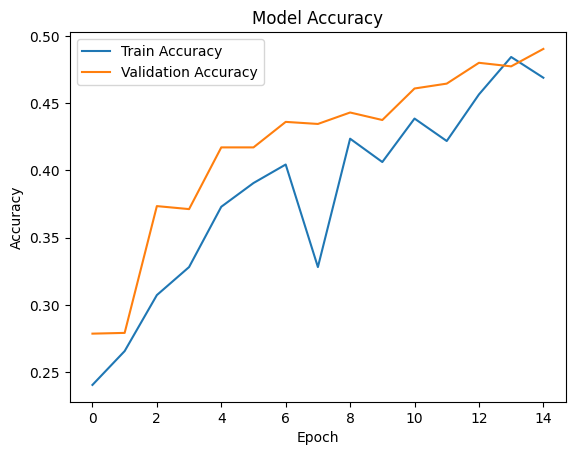

In [41]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("emotion_model.h5")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48)) / 255.0
        roi_gray = np.expand_dims(roi_gray, axis=-1)
        roi_gray = np.expand_dims(roi_gray, axis=0)

        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]

        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow('Facial Expression Agent', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()


In [44]:
!pip install -q gradio opencv-python



In [ ]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_model.h5")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_emotion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48, 48)) / 255.0
        roi = np.expand_dims(roi, axis=-1)
        roi = np.expand_dims(roi, axis=0)
        prediction = model.predict(roi)
        label = emotion_labels[np.argmax(prediction)]

        cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    return image

# Launch the Gradio interface
gr.Interface(
    fn=detect_emotion,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Detected Emotion"),
    title="Facial Expression Detection",
    description="Upload an image with a face to detect its emotion"
).launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://db2a06103a9a281a75.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 350, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2235, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1746, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
